# Pandas exercise
In this exercise, we will work with Pandas DataFrame objects. Some relevant documentation can be found here:
- [Intro to Pandas DataFrame](http://pandas.pydata.org/pandas-docs/dev/dsintro.html#dataframe)
- [Pandas DataFrame API](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html)
- [Pandas DataFrame plot() method](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.plot.html)
- [Pandas plotting documentation](http://pandas.pydata.org/pandas-docs/dev/visualization.html)
- [Complete Pandas API reference](http://pandas.pydata.org/pandas-docs/dev/api.html)

As data, we will work with randomly generated data. For this, we use the Numpy package (Numerical Python). We'll create four series of random numbers: X, Y, P and U. They are assigned right below.

In [94]:
import pandas as pd
import numpy as np

X = np.random.normal(100, 15, 400)
Y = 1.8 * X + np.random.normal(0, 9.0, 400)
P = 10 ** X + np.random.normal(0, 1000.0, 400)
U = np.random.uniform(10000, 100000, 400)

## 1. Create a pandas DataFrame with the series X, Y, P and U as columns
Create a DataFrame object from the series created above with matching column names and show the first 20 rows in the frame.

In [95]:
data_frame = pd.DataFrame({ 'X': X, 'Y': Y, 'P': P, 'U': U})
data_frame.head(20)

,P,U,X,Y
0,3.445249e+98,43043.607772,98.537221,180.473685
1,4.119449e+127,22516.735477,127.614839,232.699785
2,1.869789e+84,92859.466864,84.271793,147.884130
3,7.224335e+94,97567.763895,94.858798,167.384347
4,3.504534e+96,97897.695415,96.544630,162.016948
5,8.114116e+145,48362.206820,145.909241,265.935068
6,8.755914e+89,45083.021029,89.942301,150.574777
7,1.774623e+101,94167.161520,101.249106,184.805662
8,1.882810e+90,56487.624787,90.274807,165.801779
9,1.348960e+98,95219.601746,98.129999,167.901758


## 2. Make a plot that shows the relation between X and Y
Usually, the first step to showing a relation between two variables is creating a scatter plot. See the plot documentation on how to create this kind of plot from a DataFrame.

In [96]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


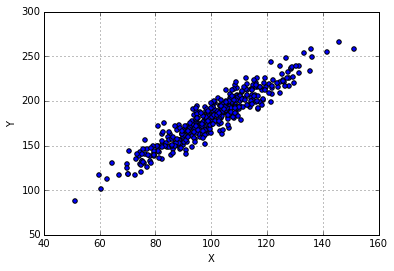

In [97]:
data_frame.plot(kind='scatter', x='X', y='Y')

## 3. Make a plot that shows the relation between X and P

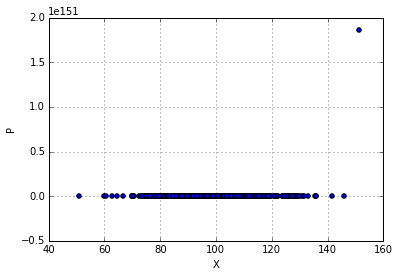

In [98]:
# First attempt: regular scatter plot
data_frame.plot(kind='scatter', x='X', y='P')

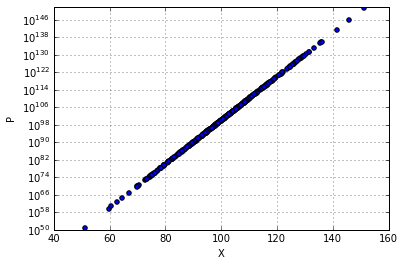

In [99]:
# The plot above doesn't really reveal the relation between the two
# variables, mostly because the values for P range from very small
# to very large and appear to have little in between. Sometimes,
# this indicates a power law distribution. To verify this, we can
# tell Pandas to create a log scale on the vertical axis in which
# case the exponential relationship should look lineair.

data_frame.plot(kind='scatter', x='X', y='P', logy=True)

## 4. Make a plot that shows the distributions of X and U

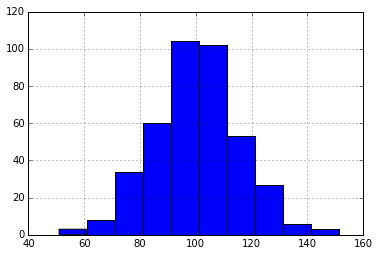

In [100]:
# Options 1: histogram
data_frame.X.hist()

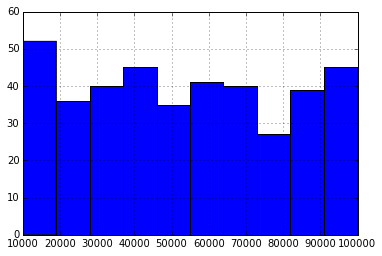

In [101]:
data_frame.U.hist()

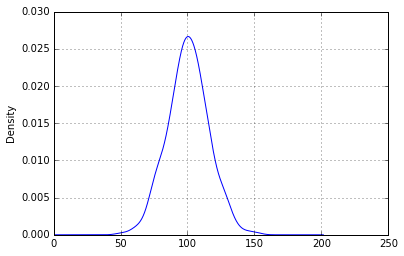

In [102]:
# Option 2: kernel density estimate
data_frame.X.plot(kind='kde')

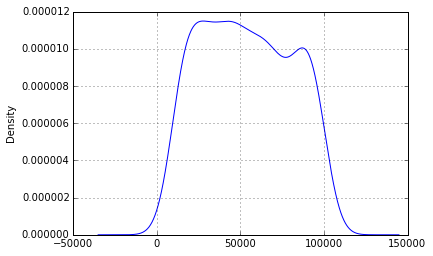

In [103]:
data_frame.U.plot(kind='kde')

## 5. Create a new column from Y divided by X
This new column will allow us to figure out the magnitude of the lineair relation between X and Y that we have seen in the scatter plot of the two variables. For the new column, calculate the mean, variance and standard deviation, so we can learn about the distribution of the noise in the lineair relation. Also, it may make sense to plot the distribution of the difference to further visualize the noise.

In [104]:
# Create the new column
data_frame['X_over_Y'] = data_frame.Y / data_frame.X

In [105]:
# Get the statistics for the new column
# This shows us that on aveerage Y = 1.8 * X
# However, there is some noise, so Y = 1.8 * X + noise
data_frame.X_over_Y.mean(), data_frame.X_over_Y.var(), data_frame.X_over_Y.std()

(1.8044676500777665, 0.0098780934345564959, 0.099388598111435786)

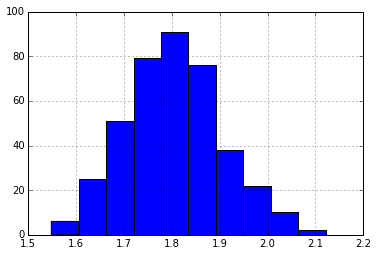

In [106]:
# Here we see that the distribution of the noise
# appears to be a normal distribution
data_frame.X_over_Y.hist()